## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import requests
import matplotlib.pyplot as plt
%matplotlib inline




Using TensorFlow backend.


<Response [200]>

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE = [10, 15, 20, 25]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

C:\Users\1911141\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 1s 28us/step - loss: 1.7192 - accuracy: 0.3986 - val_loss: 1.9804 - val_accuracy: 0.2884
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.5965 - accuracy: 0.4398 - val_loss: 1.8295 - val_accuracy: 0.3652
Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5270 - accuracy: 0.4650 - val_loss: 1.7021 - val_accuracy: 0.4165
Epoch 5/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4714 - accuracy: 0.4841 - val_loss: 1.6294 - val_accuracy: 0.4328
Epoch 6/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4265 - accuracy: 0.4995 - val_loss: 1.5717 - val_accuracy: 0.4468
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3871 - accuracy: 0.5143 - val_loss: 1.5538 - val_accuracy: 0.4566
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3532 - accuracy: 0.5289 - val_loss: 1.5150 - val

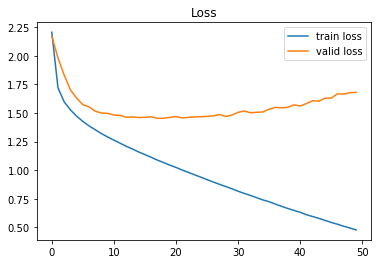

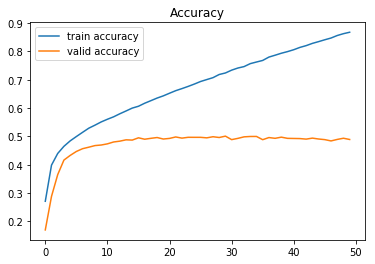

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512 

C:\Users\1911141\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 1s 28us/step - loss: 1.7333 - accuracy: 0.3956 - val_loss: 1.9921 - val_accuracy: 0.2629
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6075 - accuracy: 0.4345 - val_loss: 1.8305 - val_accuracy: 0.3539
Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5361 - accuracy: 0.4619 - val_loss: 1.7301 - val_accuracy: 0.3948
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4825 - accuracy: 0.4804 - val_loss: 1.6644 - val_accuracy: 0.4066
Epoch 6/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4382 - accuracy: 0.4974 - val_loss: 1.5878 - val_accuracy: 0.4400
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3999 - accuracy: 0.5108 - val_loss: 1.5441 - val_accuracy: 0.4518
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3653 - accuracy: 0.5247 - val_loss: 1.5242 - val

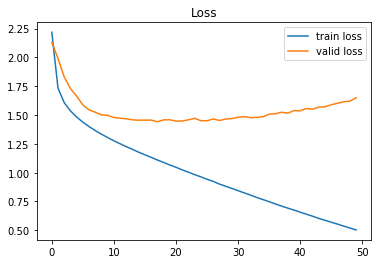

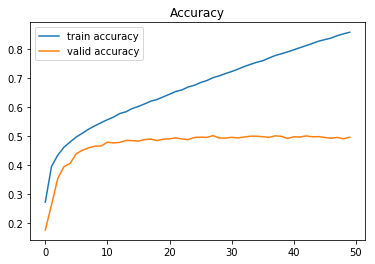

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512 

C:\Users\1911141\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 1s 28us/step - loss: 1.7386 - accuracy: 0.3917 - val_loss: 1.9515 - val_accuracy: 0.2913
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6202 - accuracy: 0.4304 - val_loss: 1.8269 - val_accuracy: 0.3557
Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5512 - accuracy: 0.4542 - val_loss: 1.7075 - val_accuracy: 0.4043
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4999 - accuracy: 0.4731 - val_loss: 1.6403 - val_accuracy: 0.4186
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4565 - accuracy: 0.4873 - val_loss: 1.5994 - val_accuracy: 0.4302
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4190 - accuracy: 0.5017 - val_loss: 1.5597 - val_accuracy: 0.4466
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3842 - accuracy: 0.5136 - val_loss: 1.5361 - val

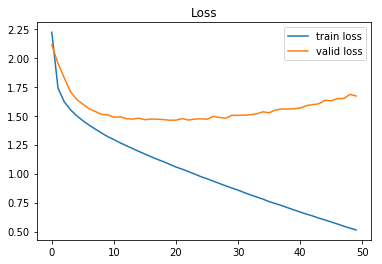

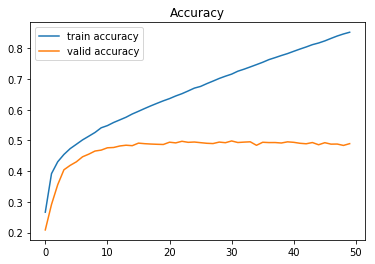

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

C:\Users\1911141\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 1s 28us/step - loss: 1.7541 - accuracy: 0.3876 - val_loss: 1.9951 - val_accuracy: 0.2956
Epoch 3/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6282 - accuracy: 0.4279 - val_loss: 1.8515 - val_accuracy: 0.3489
Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5537 - accuracy: 0.4571 - val_loss: 1.7400 - val_accuracy: 0.3893
Epoch 5/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4971 - accuracy: 0.4763 - val_loss: 1.6648 - val_accuracy: 0.4140
Epoch 6/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4504 - accuracy: 0.4937 - val_loss: 1.5992 - val_accuracy: 0.4331
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4085 - accuracy: 0.5086 - val_loss: 1.5558 - val_accuracy: 0.4484
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.3727 - accuracy: 0.5224 - val_loss: 1.5329 - val

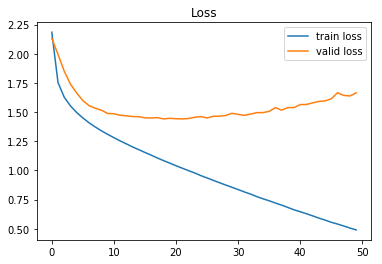

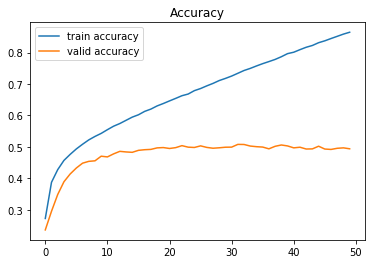

In [7]:
from keras.callbacks import EarlyStopping
"""
# 載入 Callbacks, 並將 monitor 設定為監控 validation loss
"""
# Define results
results = {}
for patience in PATIENCE :


    # 如'acc','val_acc','loss'和'val_loss'等等。
    earlystop = EarlyStopping(monitor = "val_acc",    # 試改變 monitor "Validation Accuracy" 並比較結果
                              patience = patience,    # 調整 earlystop 的等待次數至 10, 25 並比較結果
                              verbose=1
                              )


    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    # plot
    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()